In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df

,Timestamp,DEMO_DMD_Suitcase_Airflow|3
0,2020-07-23T07:03:15.364Z,-0.583
1,2020-07-23T07:03:15.372Z,-0.583
2,2020-07-23T07:03:15.384Z,-0.583
3,2020-07-23T07:03:15.395Z,-0.583
4,2020-07-23T07:03:15.403Z,-0.583
...,...,...
137754,2020-07-23T07:25:58.507Z,-0.790
137755,2020-07-23T07:25:58.515Z,-0.784
137756,2020-07-23T07:25:58.523Z,-0.778
137757,2020-07-23T07:25:58.531Z,-0.766


In [3]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df = df.rename({"DEMO_DMD_Suitcase_Airflow|3":"data"}, axis='columns')
df

,Timestamp,data
0,2020-07-23 07:03:15.364000+00:00,-0.583
1,2020-07-23 07:03:15.372000+00:00,-0.583
2,2020-07-23 07:03:15.384000+00:00,-0.583
3,2020-07-23 07:03:15.395000+00:00,-0.583
4,2020-07-23 07:03:15.403000+00:00,-0.583
...,...,...
137754,2020-07-23 07:25:58.507000+00:00,-0.790
137755,2020-07-23 07:25:58.515000+00:00,-0.784
137756,2020-07-23 07:25:58.523000+00:00,-0.778
137757,2020-07-23 07:25:58.531000+00:00,-0.766


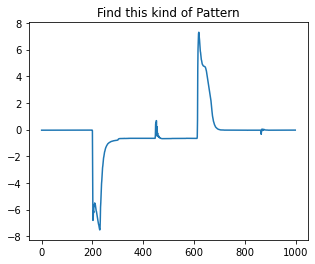

In [21]:
data = df["data"].values[10000:30000]

#pattern 1
#pattern = df["data"].values[10900:11650]

#pattern2
pattern = df["data"].values[10650:11650]

plt.figure(figsize=(5,4))
plt.plot(pattern)
plt.title('Find this kind of Pattern')
plt.show()


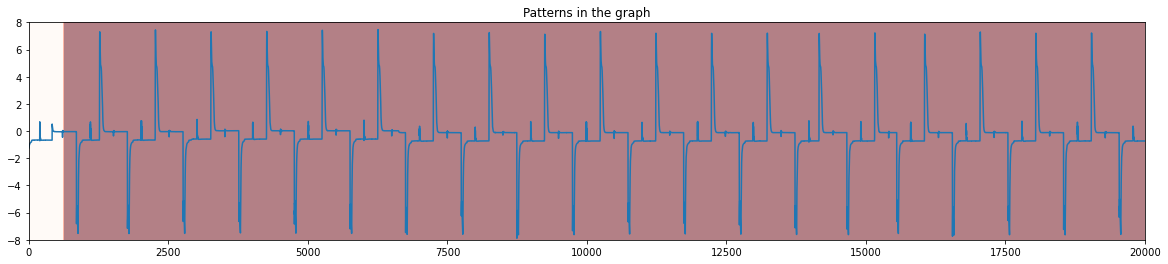

In [23]:
threshold = 0.35

conv = np.convolve(data,np.flip(pattern),mode="same")
conv = conv/np.max(conv)
conv[conv < threshold] = 0

copy = np.copy(conv)
m = int(len(pattern)/2)
for i, val in enumerate(conv):
    if val > 0:
        copy[i-m:i+m] = 1


fig,ax = plt.subplots(1,1,figsize=(20,4))
plt.title('Patterns in the graph')
ax.imshow(copy.reshape(1,-1),aspect="auto", extent=[0, 20000,-8, 8],cmap="Reds",alpha=0.5)
ax.plot(data)



plt.show()

